In [924]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

input_path = "/kaggle/input"
if not os.path.exists("/kaggle/input"):
    input_path = "./kaggle/input"

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/.DS_Store
./kaggle/input/insurance/insurance.csv


In [925]:
df = pd.read_csv(f"{input_path}/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [926]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [927]:
X = df.loc[:, df.columns != "charges"].astype(float)
y = df.loc[:, df.columns == "charges"].astype(float)
X.shape, y.shape

((1338, 11), (1338, 1))

In [928]:
print("Features:\n")
X.head()

Features:



,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [929]:
print("Charges:\n")
y.head()

Charges:



,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [930]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [931]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
217,27.0,23.10,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
754,24.0,33.63,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
647,40.0,23.37,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1331,23.0,33.40,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
835,42.0,35.97,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [932]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

column_transformer = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]), remainder='passthrough')
column_transformer.fit(X_train)
column_transformer.get_feature_names_out()

array(['minmaxscaler__age', 'minmaxscaler__bmi', 'minmaxscaler__children',
       'remainder__sex_female', 'remainder__sex_male',
       'remainder__smoker_no', 'remainder__smoker_yes',
       'remainder__region_northeast', 'remainder__region_northwest',
       'remainder__region_southeast', 'remainder__region_southwest'],
      dtype=object)

In [933]:
X_train = pd.DataFrame(column_transformer.transform(X_train), columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())

In [934]:
X_train.head()

,minmaxscaler__age,minmaxscaler__bmi,minmaxscaler__children,remainder__sex_female,remainder__sex_male,remainder__smoker_no,remainder__smoker_yes,remainder__region_northeast,remainder__region_northwest,remainder__region_southeast,remainder__region_southwest
0,0.804348,0.373150,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.065217,0.508744,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.304348,0.575061,0.2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.260870,0.621200,0.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.565217,0.166129,0.4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [935]:
 X_test.head()

,minmaxscaler__age,minmaxscaler__bmi,minmaxscaler__children,remainder__sex_female,remainder__sex_male,remainder__smoker_no,remainder__smoker_yes,remainder__region_northeast,remainder__region_northwest,remainder__region_southeast,remainder__region_southwest
0,0.195652,0.192090,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.130435,0.475383,0.8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.478261,0.199354,0.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.108696,0.469196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.521739,0.538337,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [936]:
y_train.head()

,charges
1091,11286.53870
700,2020.55230
319,4667.60765
725,40932.42950
384,8302.53565


In [937]:
y_test.head()

,charges
217,2483.73600
754,17128.42608
647,8252.28430
1331,10795.93733
835,7160.33030


In [938]:
import tensorflow as tf

print(tf.__version__)

for device in tf.config.list_physical_devices():
    print(device)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

tf.__version__

2.12.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Num GPUs Available:  1


'2.12.0'

In [939]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1536, activation="leaky_relu"),
    tf.keras.layers.Dense(2048, activation="leaky_relu"),
    tf.keras.layers.Dense(1),
])

In [940]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.legacy.Adam(), metrics=["mse"])

In [941]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [942]:
model.fit(X_train, y_train, epochs=500, validation_split=0.15, callbacks=[callback])

Epoch 1/500
31/31 [==============================] - 2s 29ms/step - loss: 309112768.0000 - mse: 309112768.0000 - val_loss: 296441792.0000 - val_mse: 296441792.0000
Epoch 2/500
31/31 [==============================] - 0s 10ms/step - loss: 264960224.0000 - mse: 264960224.0000 - val_loss: 206896240.0000 - val_mse: 206896240.0000
Epoch 3/500
31/31 [==============================] - 0s 8ms/step - loss: 157515312.0000 - mse: 157515312.0000 - val_loss: 127560984.0000 - val_mse: 127560984.0000
Epoch 4/500
31/31 [==============================] - 0s 9ms/step - loss: 116959576.0000 - mse: 116959576.0000 - val_loss: 110055040.0000 - val_mse: 110055040.0000
Epoch 5/500
31/31 [==============================] - 0s 9ms/step - loss: 99564744.0000 - mse: 99564744.0000 - val_loss: 93605800.0000 - val_mse: 93605800.0000
Epoch 6/500
31/31 [==============================] - 0s 9ms/step - loss: 83234824.0000 - mse: 83234824.0000 - val_loss: 76473192.0000 - val_mse: 76473192.0000
Epoch 7/500
31/31 [=========

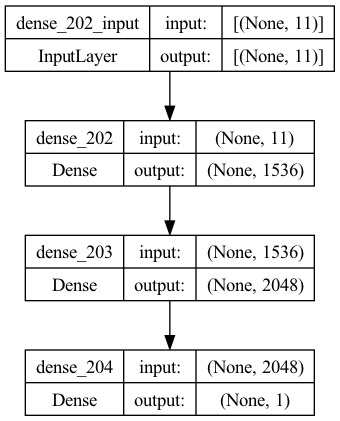

In [943]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [944]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 1536)              18432     
                                                                 
 dense_203 (Dense)           (None, 2048)              3147776   
                                                                 
 dense_204 (Dense)           (None, 1)                 2049      
                                                                 
Total params: 3,168,257
Trainable params: 3,168,257
Non-trainable params: 0
_________________________________________________________________


In [945]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 23193702.0000 - mse: 23193702.0000


[23193702.0, 23193702.0]

In [946]:
preds = model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


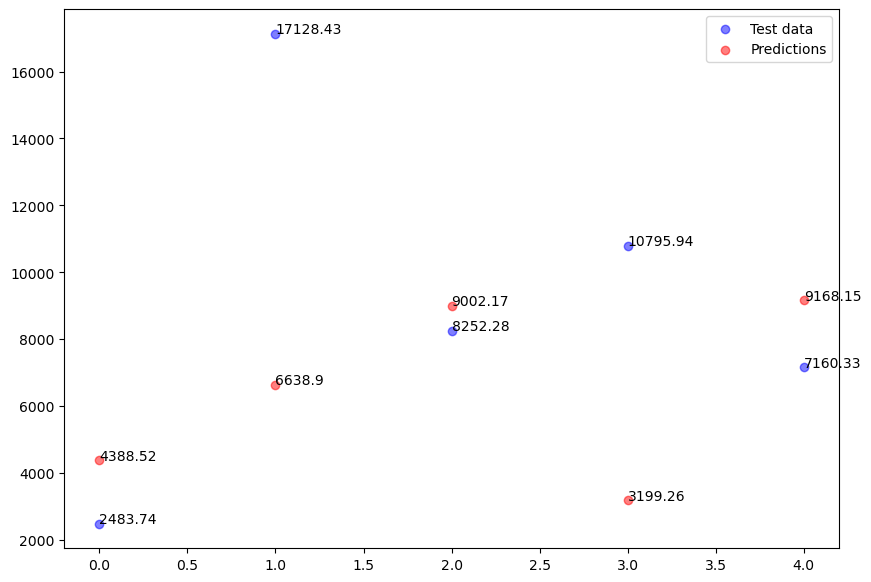

In [947]:
import matplotlib.pyplot as plt

n = 5
p = preds[:n]
indexes = X_test.index[:n]
labels = list(y_test.iloc[:n, 0])


plt.figure(figsize=(10, 7))
plt.scatter(indexes, labels, c="b", label="Test data", alpha=0.5)
plt.scatter(indexes, p, c="r", label="Predictions", alpha=0.5)
plt.legend()

for x, y in zip(indexes, labels):
    plt.annotate(round(y, 2), xy=(x, y))

for x, y in zip(indexes, p):
    plt.annotate(round(y[0], 2), xy=(x, y))


In [948]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.872749541238308